[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/Code_10_5_Prediction_Follies.ipynb)

Import lots of packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Generate fake data using a log regression model.

In [2]:
np.random.seed(100)
x1 = np.random.normal(0,1,100)

Beta_0 = -2
Beta_1 = .5

y = np.exp(Beta_0 + Beta_1*x1+ np.random.normal(0,.1,100))

Plot x versus y

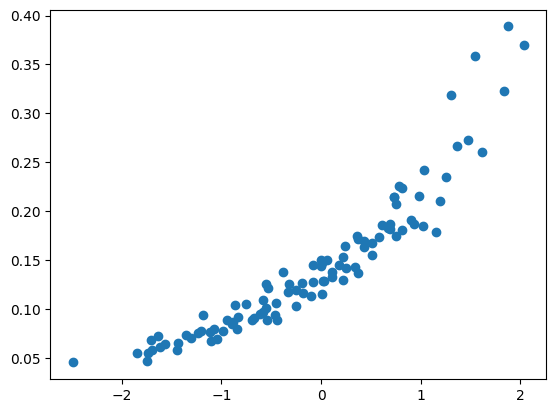

In [3]:
plt.scatter(x1,y)

Instead of using a log regression model (like we should) let's use a quadratic term. Looking at the plot this could be justified.

In [4]:
fake_dat = pd.DataFrame({"y":y,"x1":x1})
mod_reg = smf.ols("y ~ x1 + np.power(x1,2) ",fake_dat).fit()
mod_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     671.8
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.47e-57
Time:                        18:12:00   Log-Likelihood:                 256.25
No. Observations:                 100   AIC:                            -506.5
Df Residuals:                      97   BIC:                            -498.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1331      0.002     53.553      0.000       0.128       0.138
x1                  0.0726      0.002     36.467      0.000       0.069       0.077
np.power(x1, 2)     0.0185      0.002     10.754      0.000       0.015       0.022
==============================================================================
Omnibus:                       16.271   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.003
Skew:                           0.462   Prob(JB):                     2.79e-10
Kurtosis:                       6.116   Cond. No.                         2.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The output looks good. Let's predict at the point x = 0. This is right in the middle of the x's.

In [5]:
new_data = pd.DataFrame({"x1":[0]})
trueval = np.exp(Beta_0 + Beta_1*new_data.x1)
trueval

0    0.135335
Name: x1, dtype: float64

In [6]:
new_data = pd.DataFrame({"x1":[0]})
mod_reg.predict(new_data)

0    0.133135
dtype: float64

The prediction is pretty close to the truth. It is a good prediction. Now predict at x=1, which is not right in the middle, but pretty close.

In [7]:
new_data = pd.DataFrame({"x1":[1]})
trueval = np.exp(Beta_0 + Beta_1*new_data.x1)
print(trueval)
mod_reg.predict(new_data)


0    0.22313
Name: x1, dtype: float64


0    0.224279
dtype: float64

Again, pretty good. Now predict at x = 10. This is outside the range of our data. Pretty far outside even, but it's to prove a point.

In [10]:
new_data = pd.DataFrame({"x1":[4]})
trueval = np.exp(Beta_0 + Beta_1*new_data.x1)
print(trueval)
mod_reg.predict(new_data)

0    1.0
Name: x1, dtype: float64


0    0.719841
dtype: float64

When you predict outside of the range of your x's, this is called extrapolation. Extrapolation is bad. If you have identified the correct system, then it's okay, but usually you are working with the data you have in the shape it's in and that means you don't have the correct system.

Folly #1: Don't predict outside of the range of your x's.

Let's build a log regression model. This is in fact, the correct system for our data.

In [11]:
mod_reg_log = smf.ols("np.log(y) ~ x1",fake_dat).fit()
mod_reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1944.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.97e-66
Time:                        18:17:53   Log-Likelihood:                 83.482
No. Observations:                 100   AIC:                            -163.0
Df Residuals:                      98   BIC:                            -157.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0089      0.011   -188.309      0.000      -2.030      -1.988
x1             0.4822      0.011     44.090      0.000       0.461       0.504
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.808
Skew:                           0.148   Prob(JB):                        0.668
Kurtosis:                       2.674   Cond. No.                         1.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When we predict using this model, the prediction is again bad!

In [12]:
new_data = pd.DataFrame({"x1":[0]})
trueval = np.exp(Beta_0 + Beta_1*new_data.x1)
print(trueval)
np.exp(mod_reg_log.predict(new_data))

0    0.135335
Name: x1, dtype: float64


0    0.13414
dtype: float64

If we transform y for the model, we need to transform the predictions back.

In [16]:
new_data = pd.DataFrame({"x1":[5]})
trueval = np.exp(Beta_0 + Beta_1*new_data.x1)
print(trueval)
np.exp(mod_reg_log.predict(new_data))

0    1.648721
Name: x1, dtype: float64


0    1.495321
dtype: float64

Scaling and standardizing the data also transforms the y variable.

In [29]:
scale= StandardScaler()
scaled_object = scale.fit(fake_dat)
scaled_dat = scale.transform(fake_dat)
scaled_dat = pd.DataFrame(scaled_dat,columns = fake_dat.columns)
mod_reg_scaled = smf.ols("y ~ x1 + np.power(x1,2) ",scaled_dat).fit()
mod_reg_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     671.8
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.47e-57
Time:                        18:25:12   Log-Likelihood:                -6.9865
No. Observations:                 100   AIC:                             19.97
Df Residuals:                      97   BIC:                             27.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2421      0.035     -6.986      0.000      -0.311      -0.173
x1                  0.9276      0.026     35.202      0.000       0.875       0.980
np.power(x1, 2)     0.2421      0.023     10.754      0.000       0.197       0.287
==============================================================================
Omnibus:                       16.271   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.003
Skew:                           0.462   Prob(JB):                     2.79e-10
Kurtosis:                       6.116   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
new_data = pd.DataFrame({"x1":[0]})
trueval = np.exp(Beta_0 + Beta_1*new_data.x1)
print(trueval)
mod_reg_scaled.predict(new_data)

0    0.135335
Name: x1, dtype: float64


0   -0.242095
dtype: float64

So we must transform the predictions back in order to compare.

In [31]:
print(trueval)
# Unstandardize by multiplying by the standard deviation of the original data and adding the mean.
mod_reg_scaled.predict(new_data)*np.std(fake_dat.y) + np.mean(fake_dat.y)
#mod_reg_scaled.predict(new_data)*np.std()

0    0.135335
Name: x1, dtype: float64


0    0.12577
dtype: float64

Folly #2: If you transform the target variable, make sure to transform the prediction back!

Lets make a new data set. This is a nonlinear relationship between x and y.

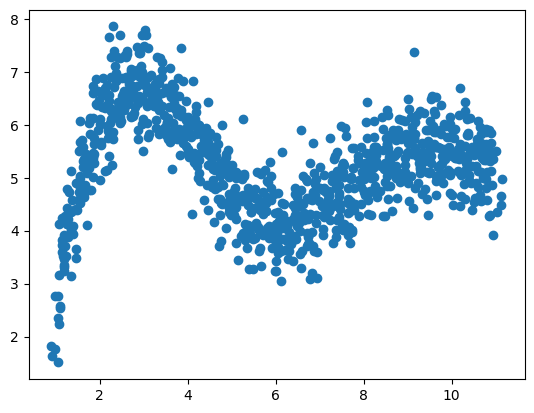

In [32]:
x = np.linspace(1,11,1000) + np.random.normal(0,.1,1000)
y = 5 + 5*np.sin(11-x)/x + np.random.normal(0,.5,1000)
plt.scatter(x,y)

Maybe we can use a high order polynomial to estimate the relationship.

In [33]:
sin_dat = pd.DataFrame({"y":y,"x":x})
mod_reg_poly = smf.ols("y ~ x + np.power(x,2) + np.power(x,3) + np.power(x,4) + np.power(x,5)",sin_dat).fit()
mod_reg_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     511.9
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          5.60e-272
Time:                        18:26:32   Log-Likelihood:                -757.32
No. Observations:                1000   AIC:                             1527.
Df Residuals:                     994   BIC:                             1556.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -7.9165      0.420    -18.841      0.000      -8.741      -7.092
x                 14.6674      0.526     27.911      0.000      13.636      15.699
np.power(x, 2)    -5.1681      0.229    -22.582      0.000      -5.617      -4.719
np.power(x, 3)     0.7762      0.045     17.412      0.000       0.689       0.864
np.power(x, 4)    -0.0519      0.004    -13.055      0.000      -0.060      -0.044
np.power(x, 5)     0.0013      0.000      9.565      0.000       0.001       0.002
==============================================================================
Omnibus:                        0.374   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.830   Jarque-Bera (JB):                0.310
Skew:                           0.040   Prob(JB):                        0.856
Kurtosis:                       3.032   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Plot the fitted line in red and the true line in blue.

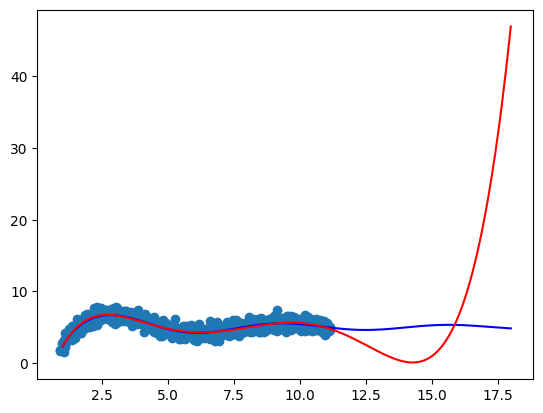

In [37]:
x_grid = np.linspace(1,18,200)
true_line = 5 + 5*np.sin(11-x_grid)/x_grid
betas = mod_reg_poly.params
fitted_line = betas[0] + betas[1]*x_grid + betas[2]*(x_grid**2) + betas[3]*(x_grid**3) + betas[4]*(x_grid**4) + + betas[5]*(x_grid**5)

plt.plot(x_grid,true_line,color="b")
plt.plot(x_grid,fitted_line,color="r")
plt.scatter(x,y)
plt.show()

Polynomial predictors get wrecked with even a small amount of exrapolation.

Folly #3: A simpler model will often predict better than an overly complicated model. Higher order polynomials for example are notoriously susceptible to divergent predictions.